<H1><B>TCC PUC MINAS - FEVEREIRO/2024</B><BR>
ANÁLISE CLASSIFICATÓRIA DE RISCO BASEADO NA SINISTRALIDADE MODALIDADE FURTO E ROUBO<BR>
MARCUS ALBERTO ROSA SANTOS
<H1/>


# Importação das bibliotecas

In [1]:
#Evitando mensagem de warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impontando bibliotecas de trabalho
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from datetime import datetime

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

# Carregamento dos arquivos

In [3]:
#ARQUIVO PRINCIPAL
try:
    dados = pd.read_csv('arq_casco_comp.csv', sep=';', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dados = pd.read_csv('arq_casco_comp.csv', sep=';', encoding='latin1')
    except UnicodeDecodeError:
        dados = pd.read_csv('arq_casco_comp.csv', sep=';', encoding='iso-8859-1')

#RENOMEIA AS COLUNAS
dados = dados.rename(columns={'COD_TARIF': 'COD_CATEGORIA', 'REGIAO':'COD_REGIAO','COD_MODELO':'COD_VEICULO','IDADE':'COD_IDADE','SEXO':'COD_SEXO','PREMIO1':'PREMIO','INDENIZ2':'INDENIZ_COL_PARC'})

In [4]:
#ARQUIVO AUXILIAR DE VEICULOS

try:
    dadosveic = pd.read_csv('auto2_vei.csv', sep=';', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dadosveic = pd.read_csv('auto2_vei.csv', sep=';', encoding='latin1')
    except UnicodeDecodeError:
        dadosveic = pd.read_csv('auto2_vei.csv', sep=';', encoding='iso-8859-1')

#RENOMEIA AS COLUNAS
dadosveic = dadosveic.rename(columns={'CODIGO': 'COD_VEICULO', 'DESCRICAO': 'DESC_VEICULO','COD_GRUPO': 'COD_GP_VEICULO','GRUPO': 'DESC_GP_VEICULO'})

In [5]:
#ARQUIVO AUXILIAR DE REGIAO
try:
    dadosRegiao = pd.read_csv('auto_reg.csv', sep=';', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dadosRegiao = pd.read_csv('auto_reg.csv', sep=';', encoding='latin1')
    except UnicodeDecodeError:
        dadosRegiao = pd.read_csv('auto_reg.csv', sep=';', encoding='iso-8859-1')

        #RENOMEIA AS COLUNAS
dadosRegiao = dadosRegiao.rename(columns={'CODIGO': 'COD_REGIAO', 'DESCRICAO':'DESC_REGIAO'})

In [6]:
#ARQUIVO AUXILIAR DE CATEGORIA

try:
    dadosCategoria = pd.read_csv('auto_cat.csv', sep=';', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dadosCategoria = pd.read_csv('auto_cat.csv', sep=';', encoding='latin1')
    except UnicodeDecodeError:
        dadosCategoria = pd.read_csv('auto_cat.csv', sep=';', encoding='iso-8859-1')

#RENOMEIA AS COLUNAS
dadosCategoria = dadosCategoria.rename(columns={'CODIGO': 'COD_CATEGORIA', 'CATEGORIA': 'DESC_CATEGORIA'})

In [7]:
#ARQUIVO AUXILIAR DE FAIXA ETARIA
dadosIdade = pd.read_excel('auto_idade.xlsx')
dadosIdade = dadosIdade.rename(columns={'codigo': 'COD_IDADE', 'descricao':'DESC_IDADE'})

# Contando os registros carregados

In [8]:
#Volunetria dataframe dados
dados.count()

COD_CATEGORIA       3390758
COD_REGIAO          3390758
COD_VEICULO         3390758
ANO_MODELO          3390758
COD_SEXO            3390758
COD_IDADE           3390758
EXPOSICAO1          3390758
PREMIO              3390758
EXPOSICAO2          3390758
PREMIO2             3390758
IS_MEDIA            3390758
FREQ_SIN1           3390758
INDENIZ1            3390758
FREQ_SIN2           3390758
INDENIZ_COL_PARC    3390758
FREQ_SIN3           3390758
INDENIZ3            3390758
FREQ_SIN4           3390758
INDENIZ4            3390758
FREQ_SIN9           3390758
INDENIZ9            3390758
ENVIO               3390758
dtype: int64

In [9]:
#Volunetria dataframe dadosveic
dadosveic.count()

COD_VEICULO        3979
DESC_VEICULO       3979
DESC_GP_VEICULO    3979
COD_GP_VEICULO     3978
dtype: int64

In [10]:
#Volunetria dataframe dadosRegiao
dadosRegiao.count()

COD_REGIAO     41
DESC_REGIAO    41
dtype: int64

In [11]:
#Volunetria dataframe dadosCategoria
dadosCategoria.count()

COD_CATEGORIA     8
DESC_CATEGORIA    8
dtype: int64

In [12]:
#Volunetria dataframe dadosIdade
dadosIdade.count()

COD_IDADE     6
DESC_IDADE    6
dtype: int64

# Visualizando as primeiras linhas

In [13]:
# VISUALIZANDO O ARQUIVO PRINCIPAL
dados.head()

,COD_CATEGORIA,COD_REGIAO,COD_VEICULO,ANO_MODELO,COD_SEXO,COD_IDADE,EXPOSICAO1,PREMIO,EXPOSICAO2,PREMIO2,...,INDENIZ1,FREQ_SIN2,INDENIZ_COL_PARC,FREQ_SIN3,INDENIZ3,FREQ_SIN4,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO
0,9,11,515153-8,2014,J,0,"16,8219174854457","20984,1537723541",0,0,...,0,0,0,0,0,0,0,0,0,2021A
1,1,2,025081-3,2006,F,5,"0,734246578067541","421,130994796753",0,0,...,0,0,0,0,0,0,0,0,0,2021A
2,1,23,004318-4,2014,F,2,"0,504109561443329","309,683074951172",0,0,...,0,0,0,0,0,0,0,0,0,2021A
3,1,39,004354-0,2011,F,5,"0,402739733457565","257,049194335938",0,0,...,0,0,0,0,0,0,0,0,0,2021A
4,1,13,515021-3,1999,M,5,"0,506849318742752","947,028137207031",0,0,...,0,0,0,0,0,0,0,0,0,2021A


In [14]:
# VISUALIZANDO O ARQUIVO AUXILIAR DE VEICULOS
dadosveic.head()

,COD_VEICULO,DESC_VEICULO,DESC_GP_VEICULO,COD_GP_VEICULO
0,038003-2,Acura - Integra GS 1.8,ACURA,1.0
1,038002-4,Acura - Legend 3.2/3.5,ACURA,1.0
2,038001-6,Acura - NSX 3.0,ACURA,1.0
3,840015-6,ADLY - ATV 100,ADLY MOTOS - TODAS,2.0
4,840014-8,ADLY - ATV 50,ADLY MOTOS - TODAS,2.0


In [15]:
# VISUALIZANDO O ARQUIVO AUXILIAR DE REGIAO
dadosRegiao.head()

,COD_REGIAO,DESC_REGIAO
0,1,RS - Met. Porto Alegre e Caxias do Sul
1,2,RS - Demais regiões
2,3,SC - Met. Florianópolis e Sul
3,4,SC - Oeste
4,5,SC - Blumenau e demais regiões


In [16]:
# VISUALIZANDO O ARQUIVO AUXILIAR DE CATEGORIAS
dadosCategoria.head()

,COD_CATEGORIA,DESC_CATEGORIA
0,1,Passeio nacional
1,2,Passeio importado
2,3,Pick-up (nacional e importado)
3,4,Veículo de Carga (nacional e importado)
4,5,Motocicleta (nacional e importado)


In [17]:
# VISUALIZANDO O ARQUIVO FAIXA ETARIA DE IDADE
dadosIdade.head()

,COD_IDADE,DESC_IDADE
0,0,Não informada
1,1,Entre 18 e 25 anos
2,2,Entre 26 e 35 anos
3,3,Entre 36 e 45 anos
4,4,Entre 46 e 55 anos


# Merge entre o dataframe principal e os auxiliares

In [18]:
#MERGE REGIAO
dados = pd.merge(dados, dadosRegiao, left_on ='COD_REGIAO', right_on='COD_REGIAO', how='inner')

In [19]:
#MERGE CATEGORIA
dados = pd.merge(dados, dadosCategoria, left_on ='COD_CATEGORIA', right_on='COD_CATEGORIA', how='inner')

In [20]:
#MERGE VEICULO
dados = pd.merge(dados, dadosveic, left_on ='COD_VEICULO', right_on='COD_VEICULO', how='inner')

In [21]:
#MERGE IDADE
dados = pd.merge(dados, dadosIdade, left_on ='COD_IDADE', right_on='COD_IDADE', how='inner')

In [22]:
dados.head()

,COD_CATEGORIA,COD_REGIAO,COD_VEICULO,ANO_MODELO,COD_SEXO,COD_IDADE,EXPOSICAO1,PREMIO,EXPOSICAO2,PREMIO2,...,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO,DESC_REGIAO,DESC_CATEGORIA,DESC_VEICULO,DESC_GP_VEICULO,COD_GP_VEICULO,DESC_IDADE
0,9,11,004321-4,2013,0,4,"0,328767120838165","201,311477661133",0,0,...,0,0,0,2021A,SP - Met. de São Paulo,Outros,GM - Chevrolet - Celta Spirit 1.0 MPFI 8V Flex...,GM CHEVROLET CELTA 1.0,168.0,Entre 46 e 55 anos
1,9,11,004321-4,2008,0,4,"0,504109561443329","172,939895629883",0,0,...,0,0,0,2021A,SP - Met. de São Paulo,Outros,GM - Chevrolet - Celta Spirit 1.0 MPFI 8V Flex...,GM CHEVROLET CELTA 1.0,168.0,Entre 46 e 55 anos
2,9,11,004321-4,2009,0,4,"0,504109561443329","204,097686767578",0,0,...,0,0,0,2021A,SP - Met. de São Paulo,Outros,GM - Chevrolet - Celta Spirit 1.0 MPFI 8V Flex...,GM CHEVROLET CELTA 1.0,168.0,Entre 46 e 55 anos
3,9,11,004321-4,2015,F,4,0,0,0,0,...,0,2,190,2021A,SP - Met. de São Paulo,Outros,GM - Chevrolet - Celta Spirit 1.0 MPFI 8V Flex...,GM CHEVROLET CELTA 1.0,168.0,Entre 46 e 55 anos
4,9,11,004321-4,2011,0,4,"1,03013694286346","416,899291992188",0,0,...,0,0,0,2021A,SP - Met. de São Paulo,Outros,GM - Chevrolet - Celta Spirit 1.0 MPFI 8V Flex...,GM CHEVROLET CELTA 1.0,168.0,Entre 46 e 55 anos


# Filtrando os registros

In [23]:
#AJUSTANDO COLUNA PREMIO DO TIPO OBJETO PARA NUMERICO
dados['PREMIO'] = dados['PREMIO'].str.replace(',', '.')
dados['PREMIO'] = dados['PREMIO'].astype(float)

In [24]:
#FILTRANDO OS REGISTROS PREMIO MAIOR QUE ZERO E INDENIZAÇÃO COLISÃO PARCIAL MAIOR QUE ZERO
dados = dados[dados['PREMIO'] > 0.00]
dados = dados[dados['INDENIZ_COL_PARC'] > 0]

In [25]:
#FILTRANDO OS REGISTROS SOMENTE COM CAMPO SEXO 'M' E 'F' 
dados = dados[dados['COD_SEXO'].isin(['F','M'])]

In [26]:
#FITLRANDO OS REGISTROS COM IDADE SEM ESPECIFICAÇÃO
dados = dados[dados['COD_IDADE'] != 0]

# Excluindo colunas desnecessárias para análise

In [27]:
#DELETA COLUNAS DESNECESSÁRIAS PARA ANALISE
dados = dados.drop(['EXPOSICAO1', 'EXPOSICAO2', 'PREMIO2', 'IS_MEDIA',
       'FREQ_SIN1', 'FREQ_SIN2', 'INDENIZ1',
       'FREQ_SIN3', 'INDENIZ3', 'FREQ_SIN4', 'INDENIZ4', 'FREQ_SIN9',
       'INDENIZ9', 'ENVIO'],axis=1)

In [28]:
#Colunas de trabalho
dados.columns

Index(['COD_CATEGORIA', 'COD_REGIAO', 'COD_VEICULO', 'ANO_MODELO', 'COD_SEXO',
       'COD_IDADE', 'PREMIO', 'INDENIZ_COL_PARC', 'DESC_REGIAO',
       'DESC_CATEGORIA', 'DESC_VEICULO', 'DESC_GP_VEICULO', 'COD_GP_VEICULO',
       'DESC_IDADE'],
      dtype='object')

# Funções para criar faixa etária para a coluna 'ANO_MODELO' 

In [29]:
# Função para calcular o código da faixa etária do veículo
def calcular_cod_faixa_etaria_veic(row):
    ano_atual = datetime.now().year
    diferenca_anos = abs(ano_atual - row['ANO_MODELO'])
    
    if diferenca_anos == 0:
        return 0
    elif 1 <= diferenca_anos <= 5:
        return 1
    elif 6 <= diferenca_anos <= 10:
        return 2
    elif diferenca_anos >= 11:
        return 3
    else:
        return 0


# Função para calcular o código da faixa etária do veículo
def calcular_Desc_faixa_etaria_veic(row):
    ano_atual = datetime.now().year
    diferenca_anos = abs(ano_atual - row['ANO_MODELO'])
    
    if diferenca_anos == 0:
        return '0 Km'
    elif 1 <= diferenca_anos <= 5:
        return '1 até 5 anos'
    elif 6 <= diferenca_anos <= 10:
        return '6 até 10 anos'
    elif diferenca_anos >= 11:
        return 'Acima de 11 anos'
    else:
        return ''

In [30]:
# Função para calcular o código da faixa de premio
# Utilizanod a regra de Sturges 
def criar_fx_premio(premio):
    if isinstance(premio, (int, float)):
        premio = [premio]
    num_bins = int(np.ceil(1 + np.log2(len(premio))))
    return pd.cut(premio, bins=num_bins)


# Aplicando a função ao dataframe de trabalho

In [31]:
dados['COD_FAIXA_ETARIA_VEICULO'] = dados.apply(calcular_cod_faixa_etaria_veic, axis=1)
dados['DESC_FAIXA_ETARIA_VEICULO'] = dados.apply(calcular_Desc_faixa_etaria_veic, axis=1)

In [32]:
#EXCLUINDO A COLUNA ANO_MODELO
dados = dados.drop(['ANO_MODELO'],axis=1)

# Ajustando os dados em diversas colunas

In [33]:
#SUBSTITUIÇÃO DOS DADOS DA COLUNA 'SEXO' PARA NUMERICO PARA M=1 E F=0
#EXECUÇÃO DA SUBSTITUIÇÃO
dados['COD_SEXO'] = dados['COD_SEXO'].replace({'M': 1, 'F': 2})

In [34]:
#LIMPANDO DADOS NA COLUNA 'COD_REGIAO'
dados = dados[dados['COD_REGIAO'] != ' .']
dados['COD_REGIAO'] = dados['COD_REGIAO'].astype(int)

In [35]:
#RETIRANDO VALORES INVALIDOS
dados = dados[dados['COD_REGIAO'] != 99]

In [36]:
#VERIFICANDO OS DADOS DA COLUNA 'COD_REGIAO'
dados['COD_REGIAO'].unique()

array([11, 23, 39, 13, 17, 38, 12,  6,  5,  8, 18,  9, 14,  4, 16,  7, 30,
        1, 41, 20, 15,  3, 37, 21, 27, 19, 29, 24, 10, 26, 28, 35, 25, 36,
        2, 22, 40, 31, 32, 34, 33])

In [37]:
#VERIFICANDO OS DADOS AJUSTADOS
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23507 entries, 13 to 432600
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COD_CATEGORIA              23507 non-null  int64  
 1   COD_REGIAO                 23507 non-null  int64  
 2   COD_VEICULO                23507 non-null  object 
 3   COD_SEXO                   23507 non-null  int64  
 4   COD_IDADE                  23507 non-null  int64  
 5   PREMIO                     23507 non-null  float64
 6   INDENIZ_COL_PARC           23507 non-null  int64  
 7   DESC_REGIAO                23507 non-null  object 
 8   DESC_CATEGORIA             23507 non-null  object 
 9   DESC_VEICULO               23507 non-null  object 
 10  DESC_GP_VEICULO            23507 non-null  object 
 11  COD_GP_VEICULO             23507 non-null  float64
 12  DESC_IDADE                 23507 non-null  object 
 13  COD_FAIXA_ETARIA_VEICULO   23507 non-null  i

In [38]:
#LISTANDO AS COLUNAS
dados.columns

Index(['COD_CATEGORIA', 'COD_REGIAO', 'COD_VEICULO', 'COD_SEXO', 'COD_IDADE',
       'PREMIO', 'INDENIZ_COL_PARC', 'DESC_REGIAO', 'DESC_CATEGORIA',
       'DESC_VEICULO', 'DESC_GP_VEICULO', 'COD_GP_VEICULO', 'DESC_IDADE',
       'COD_FAIXA_ETARIA_VEICULO', 'DESC_FAIXA_ETARIA_VEICULO'],
      dtype='object')

# backup do dataframe trabalhado

In [39]:
dados_bkp = dados.copy()

# Agrupando e criando a coluna alvo 'RISCO'
# Quando a sinistralidade for maior que 60%
# os grupos serão: Categoria, região, sexo, faixa idade, faixa idade veículo e grupo do veículo


In [40]:
#AGRUPANDO
dados_gp1 = dados.groupby(['COD_CATEGORIA'
                           ,'COD_REGIAO'
                           ,'COD_SEXO'
                           ,'COD_IDADE'
                           ,'COD_FAIXA_ETARIA_VEICULO'
                           ,'COD_GP_VEICULO'])[['PREMIO'
                                                ,'INDENIZ_COL_PARC']].sum()
dados_gp1 = dados_gp1.reset_index()

In [41]:
#VISUALISANDO OS DADOS
dados_gp1.count()

COD_CATEGORIA               13242
COD_REGIAO                  13242
COD_SEXO                    13242
COD_IDADE                   13242
COD_FAIXA_ETARIA_VEICULO    13242
COD_GP_VEICULO              13242
PREMIO                      13242
INDENIZ_COL_PARC            13242
dtype: int64

In [42]:
#INCLUINDO NOVA COLUNA DE AGRUPAMENTO PARA FAIXA DE PREMIO BASEADO NA REGRA DE STURGES
dados_gp1['FX_PREMIO'] = dados_gp1['PREMIO'].apply(criar_fx_premio)

In [43]:
dados_gp1['FX_PREMIO'] = dados_gp1['FX_PREMIO'].astype(str)

In [44]:
#VERIFICANDO O AGRUPAMENTO
dados_gp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13242 entries, 0 to 13241
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COD_CATEGORIA             13242 non-null  int64  
 1   COD_REGIAO                13242 non-null  int64  
 2   COD_SEXO                  13242 non-null  int64  
 3   COD_IDADE                 13242 non-null  int64  
 4   COD_FAIXA_ETARIA_VEICULO  13242 non-null  int64  
 5   COD_GP_VEICULO            13242 non-null  float64
 6   PREMIO                    13242 non-null  float64
 7   INDENIZ_COL_PARC          13242 non-null  int64  
 8   FX_PREMIO                 13242 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 931.2+ KB


In [45]:
#CRIANDO O CAMPO SINISTRALIDADE INDENIZACAO / PREMIO
dados_gp1['SINISTRALIDADE'] = dados_gp1.apply(lambda row: row['INDENIZ_COL_PARC'] / row['PREMIO'] if row['PREMIO'] != 0 else 0, axis=1)


In [46]:
#CRIANDO A NOVA COLUNA ALVO = RISCO
dados_gp1['RISCO']  = np.where(dados_gp1['SINISTRALIDADE']  > 0.60, 1, 0)

In [47]:
#VERIFICANDO O BALANCEAMENTO DO CAMPO RISCO
dados_gp1.groupby('RISCO')['RISCO'].count()

RISCO
0    4132
1    9110
Name: RISCO, dtype: int64

<Axes: xlabel='RISCO', ylabel='count'>

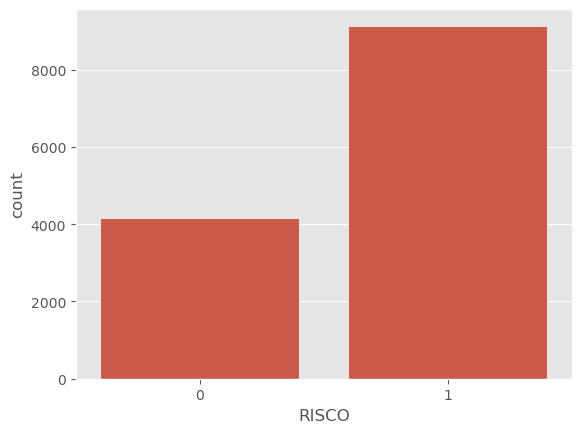

In [48]:
#Gráfico balanceamento variável alvo
sns.countplot(x='RISCO',data=dados_gp1)

# Ajustando os dados para execução dos modelos

In [49]:
#EXCLUINDO AS COLUNAS QUE NÃO SERÃO MAIS UTILIZADAS
dados_gp1 = dados_gp1.drop(['PREMIO','INDENIZ_COL_PARC','SINISTRALIDADE'],axis=1)

In [50]:
dados_gp1.head()

,COD_CATEGORIA,COD_REGIAO,COD_SEXO,COD_IDADE,COD_FAIXA_ETARIA_VEICULO,COD_GP_VEICULO,FX_PREMIO,RISCO
0,1,1,1,1,2,135.0,"[(33332.255, 33398.987]]\nCategories (1, inter...",0
1,1,1,1,1,2,136.0,"[(2371.77, 2376.518]]\nCategories (1, interval...",1
2,1,1,1,1,2,141.0,"[(2693.506, 2698.898]]\nCategories (1, interva...",0
3,1,1,1,1,2,173.0,"[(1429.291, 1432.152]]\nCategories (1, interva...",1
4,1,1,1,1,2,187.0,"[(7401.755, 7416.573]]\nCategories (1, interva...",0


In [51]:
dados_gp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13242 entries, 0 to 13241
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COD_CATEGORIA             13242 non-null  int64  
 1   COD_REGIAO                13242 non-null  int64  
 2   COD_SEXO                  13242 non-null  int64  
 3   COD_IDADE                 13242 non-null  int64  
 4   COD_FAIXA_ETARIA_VEICULO  13242 non-null  int64  
 5   COD_GP_VEICULO            13242 non-null  float64
 6   FX_PREMIO                 13242 non-null  object 
 7   RISCO                     13242 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 827.8+ KB


# Categorização os dados

In [52]:
cols = dados_gp1.drop('RISCO',axis=1).columns
cols

Index(['COD_CATEGORIA', 'COD_REGIAO', 'COD_SEXO', 'COD_IDADE',
       'COD_FAIXA_ETARIA_VEICULO', 'COD_GP_VEICULO', 'FX_PREMIO'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dados_gp1[cols] = dados_gp1[cols].apply(encoder.fit_transform)


# Divindido os dados em treinamento e teste

In [54]:
X = dados_gp1.drop('RISCO',axis=1).values
y = dados_gp1['RISCO'].values

In [56]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando a técnica de SelectBest c/ f_classif para encontrar variáveis mais significativas

In [57]:
# Aplicar a técnica SelectKBest com f_classif para seleção de variáveis
k_best = SelectKBest(score_func=f_classif, k=3)  # Selecionar as 3 melhores variáveis
X_train_k_best = k_best.fit_transform(X_train, y_train)
X_test_k_best = k_best.transform(X_test)

In [58]:
# Obtendo os percentuais de importância das variáveis
feature_scores = k_best.scores_
total_score = sum(feature_scores)
feature_importances = feature_scores / total_score
features_selected = k_best.get_support()

In [59]:
# Criando uma lista (índice, importância) e ordena pela importância
sorted_features = sorted(enumerate(feature_importances), key=lambda x: x[1], reverse=True)

# Exibindo as variáveis selecionadas, ordenadas pela mais importante
print("variáveis selecionadas, ordenadas pela mais importante:")
for feature_idx, importance in sorted_features:
    if features_selected[feature_idx]:
        feature_name = dados_gp1.columns[feature_idx]
        print(f"{feature_name}: {importance:.4f}")

variáveis selecionadas, ordenadas pela mais importante:
COD_CATEGORIA: 0.7056
COD_IDADE: 0.1326
COD_REGIAO: 0.1076


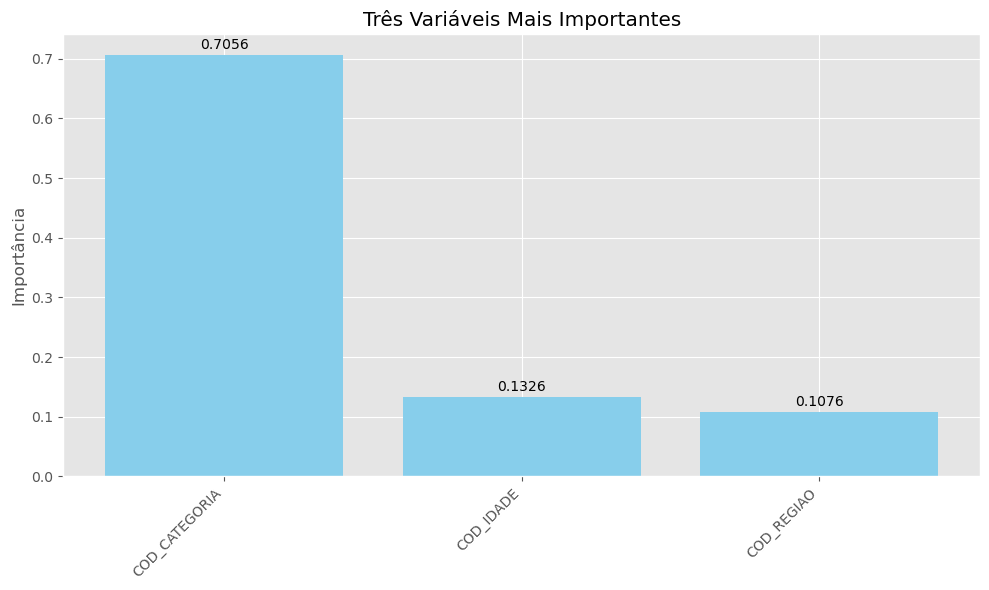

In [60]:
# Criando uma lista de tuplas (índice, importância) e ordena pela importância
sorted_features = sorted(enumerate(feature_importances), key=lambda x: x[1], reverse=True)

# Extraindo os nomes das variáveis selecionadas e suas importâncias
caracteristicas = []
importancias = []
for feature_idx, importance in sorted_features:
    if features_selected[feature_idx]:
        feature_name = dados_gp1.columns[feature_idx]
        caracteristicas.append(feature_name)
        importancias.append(importance)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(caracteristicas, importancias, color='skyblue')

# Adicionando o valor de importância em cima de cada barra
for bar, imp in zip(bars, importancias):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{imp:.4f}', ha='center', va='bottom')

# Adicionando título e rótulos aos eixos
plt.title('Três Variáveis Mais Importantes')
#plt.xlabel('Variáveis')
plt.ylabel('Importância')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Criando listas vazias para inclusão dos resultados dos modelos

In [61]:
#Criando listas vazias para cada métrica
modelos = []
acuracia = []
precision = []
recall = []
f1 = []

<h1><b>SVM</b></h1>

In [62]:
from sklearn.svm import SVC

#SVC
#Instanciando o modelo
model = SVC()
#treinando o conjunto de dados
model.fit(X_train_k_best, y_train)
#Recebendo as predições
y_pred = model.predict(X_test_k_best)

#recebendo as metricas de avaliação de desempenho
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)

# Apuração das métricas

In [63]:
#Apurando as métricas
acc_svm = accuracy_score(y_test,y_pred)
precision_svm = precision_score(y_test,y_pred,average='macro')
recall_svm = recall_score(y_test,y_pred,average='macro')
f1_svm = f1_score(y_test,y_pred,average='macro')

In [64]:
#Incluindo o resultado nas listas de métricas
modelos.append("SVM")
acuracia.append(acc_svm*100)
precision.append(precision_svm*100)
recall.append(recall_svm*100)
f1.append(f1_svm*100)

<h1><b>DECISION TREE</b></h1>

In [65]:
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier
#Instanciando o modelo
model = DecisionTreeClassifier()
#treinando o conjunto de dados
model.fit(X_train_k_best, y_train)
#Recebendo as predições
y_pred = model.predict(X_test_k_best)

#recebendo as metricas de avaliação de desempenho
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)

# Apuração das métricas

In [66]:
#Apurando as métricas
acc_dtc = accuracy_score(y_test,y_pred)
precision_dtc = precision_score(y_test,y_pred,average='macro')
recall_dtc = recall_score(y_test,y_pred,average='macro')
f1_dtc = f1_score(y_test,y_pred,average='macro')

In [67]:
#Incluindo o resultado nas listas de métricas
modelos.append("DECISION TREE")
acuracia.append(acc_dtc*100)
precision.append(precision_dtc*100)
recall.append(recall_dtc*100)
f1.append(f1_dtc*100)

<h1><b>LOGISTIC REGRESSION</b></h1>

In [68]:
from sklearn.linear_model import LogisticRegression

#LogisticRegression
#Instanciando o modelo
model = LogisticRegression()
#treinando o conjunto de dados
model.fit(X_train_k_best, y_train)
#Recebendo as predições
y_pred = model.predict(X_test_k_best)

#recebendo as metricas de avaliação de desempenho
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)

# Apuração das métricas

In [69]:
#Apurando as métricas
acc_logreg = accuracy_score(y_test,y_pred)
precision_logreg = precision_score(y_test,y_pred,average='macro')
recall_logreg = recall_score(y_test,y_pred,average='macro')
f1_logreg = f1_score(y_test,y_pred,average='macro')

In [70]:
#Incluindo o resultado nas listas de métricas
modelos.append("LOGISTIC REGRESSION")
acuracia.append(acc_logreg*100)
precision.append(precision_logreg*100)
recall.append(recall_logreg*100)
f1.append(f1_logreg*100)

# Resultado final comparando os quatro modelos

In [71]:
#Criando um dicionário para juntas todas as listas das métricas
dici = {"Modelo" : modelos, "Acuracia" : acuracia, "Precisão" : precision, "Recall" : recall, "F1" : f1}
pd_dici = pd.DataFrame(dici)
pd_dici = pd_dici.sort_values('Acuracia',ascending=False)
pd_dici

,Modelo,Acuracia,Precisão,Recall,F1
1,DECISION TREE,69.468915,62.793023,58.737992,58.910044
0,SVM,68.613139,34.306569,50.000000,40.692641
2,LOGISTIC REGRESSION,68.613139,34.306569,50.000000,40.692641


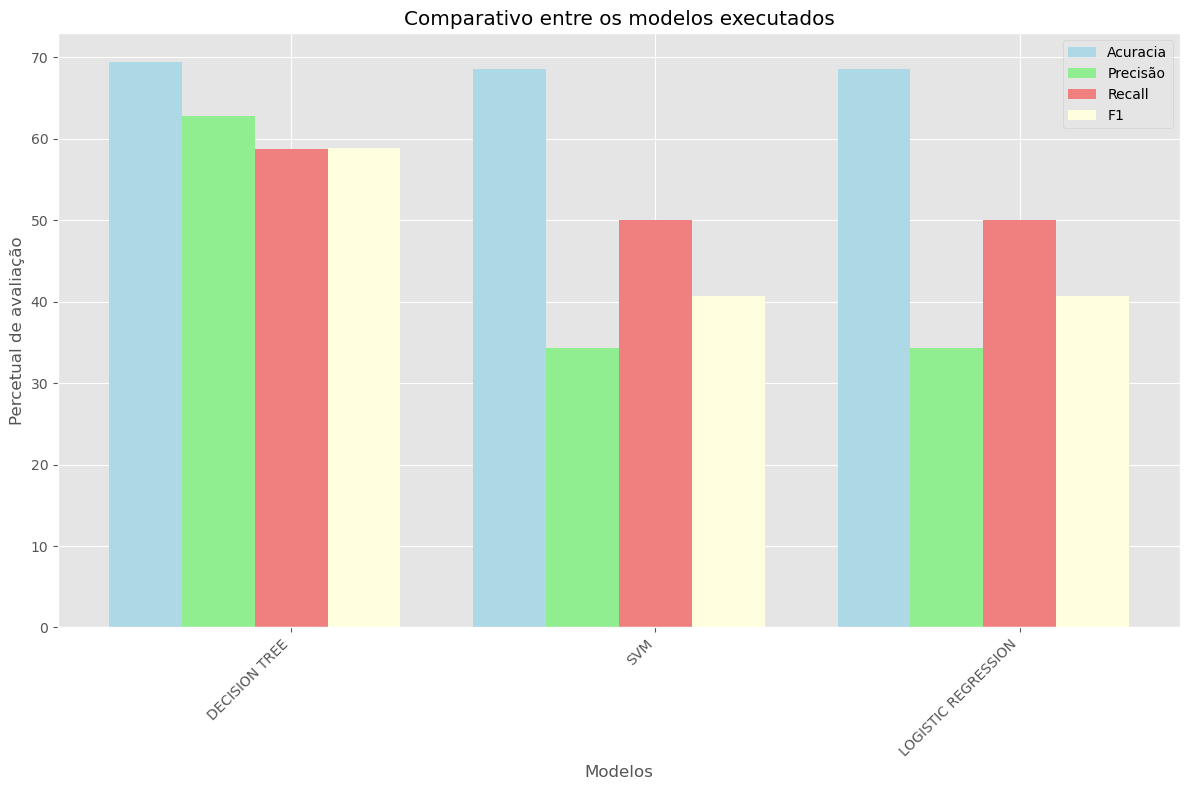

In [72]:
# Definindo as métricas e os modelos
metricas = ['Acuracia', 'Precisão', 'Recall', 'F1']
modelos = pd_dici['Modelo']
valores = pd_dici[metricas].values.T

# Definindo a largura das barras
largura_barra = 0.2
n_metricas = len(metricas)
n_modelos = len(modelos)

# Definindo cores pastéis
cores = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

# Criando o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(n_metricas):
    posicoes = np.arange(n_modelos) + (largura_barra * i) - ((largura_barra * n_metricas) / 2)
    ax.bar(posicoes, valores[i], width=largura_barra, label=metricas[i], color=cores[i])

# Adicionando legendas e rótulos
ax.set_xlabel('Modelos')
ax.set_ylabel('Percetual de avaliação')
ax.set_title('Comparativo entre os modelos executados')
ax.set_xticks(np.arange(n_modelos))
ax.set_xticklabels(modelos, rotation=45, ha='right')
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()
